In [1]:
from keras_retinanet.utils.crops_sampling import NegativeSampling, PositiveSampling
from keras_retinanet.preprocessing.pascal_voc_balanced_crops import PascalVocBalancedCropsGenerator
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.visualization import draw_box

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import numpy as np
import random

In [3]:
image_path = '../../../data/laddv4/full/JPEGImages/679.jpg'

bboxes = [[546,1310,616,1381],
          [718,1328,779,1370],
          [1045,1471,1121,1511],
          [1178,1489,1274,1537],
          [1151,916,1211,990],
          [1360,954,1418,1015],
          [2395,1443,2448,1501],
          [2545,1487,2596,1536],
          [1634,1587,1683,1630],
          [2706,28,2745,73],
          [2254,168,2340,209]]

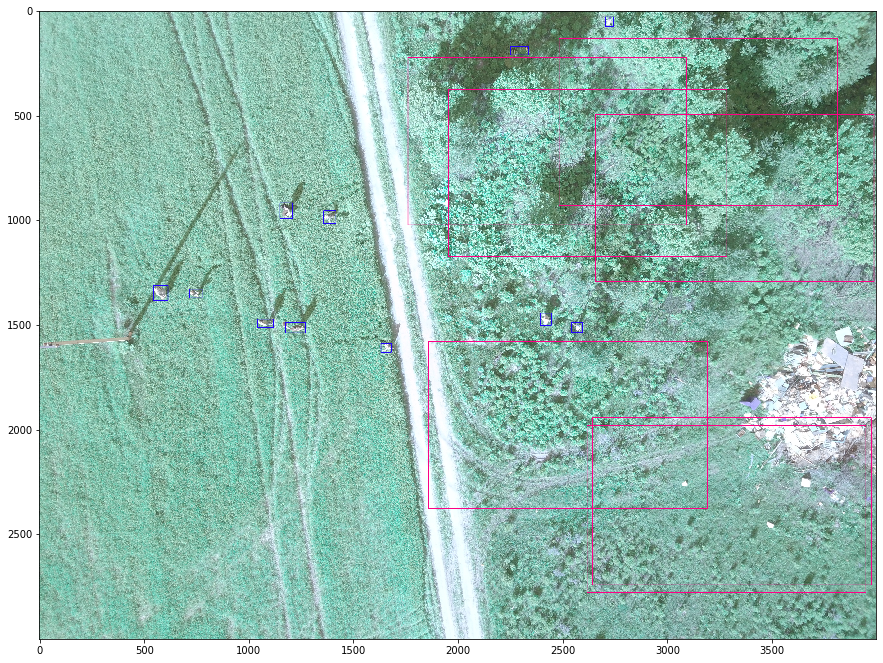

In [4]:
draw = read_image_bgr(image_path)
image_height, image_width = draw.shape[:2]

plt.figure(figsize=(15, 20))

for bbox in bboxes:
    draw_box(draw, bbox, label_color(0))
    
    
sampling = NegativeSampling(image_width, image_height, 1333, 800, bboxes)

empty_crops = [[s.x_min, s.y_min, s.x_max, s.y_max] for s in sampling.get_samples(7)]

for crop in empty_crops:
    draw_box(draw, crop, label_color(7))
    
plt.imshow(draw)

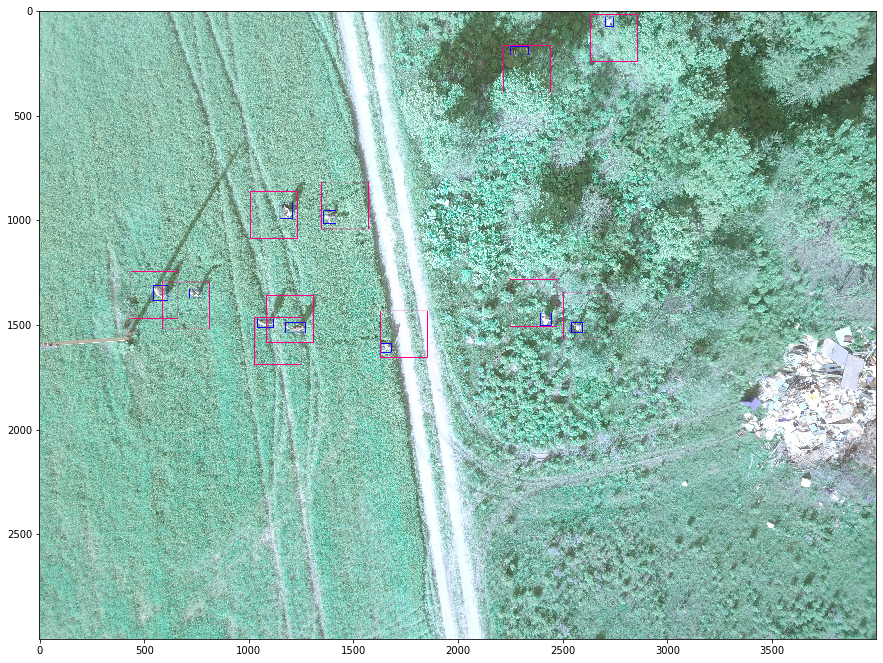

In [5]:
draw = read_image_bgr(image_path)
image_height, image_width = draw.shape[:2]

plt.figure(figsize=(15, 20))

for bbox in bboxes:
    draw_box(draw, bbox, label_color(0))
    
    
sampling = PositiveSampling(image_width, image_height, 224, 224, bboxes)

bbox_crops = [[s.x_min, s.y_min, s.x_max, s.y_max] for s in sampling.get_samples()]

for crop in bbox_crops:
    draw_box(draw, crop, label_color(7))
    
plt.imshow(draw)

In [3]:
generator = PascalVocBalancedCropsGenerator(
        1333, 800,
        negatives_per_positive=2,
        batch_size=16,
        data_dir="../../../data/laddv4/full",
        set_name='train',
        no_resize = True)

In [4]:
group = generator.groups[26]
crops_group = generator.load_image_group(group)

In [5]:
annotations_group = generator.load_annotations_group(group)

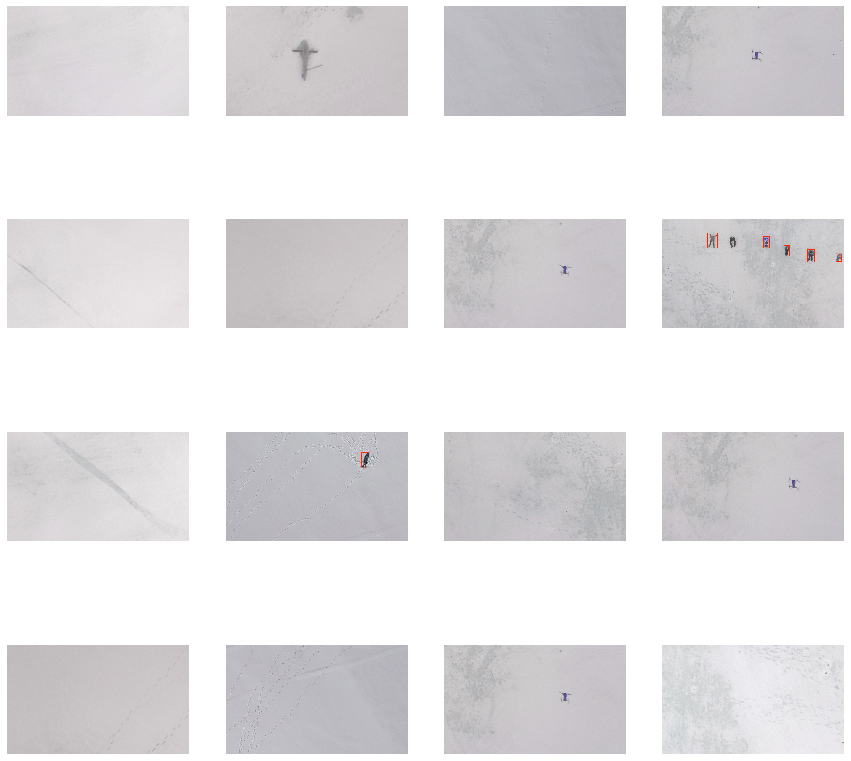

In [6]:
rows = 4
cols = 4
fig, axis = plt.subplots(rows, cols, figsize=(15, 15))

for col in range(cols):
    for row in range(rows):
        c = col*rows + row
        if rows > 1:
            ax = axis[row, col]
        else:
            ax = axis[col]
        
        ax.axis('off')
        
        draw = crops_group[c]
        for bbox in annotations_group[c]['bboxes']:
            draw_box(draw, bbox, label_color(5))
            
        ax.imshow(draw)